Lesson 01-02 - Working with multiple stocks
Populating the interactive namespace from numpy and matplotlib


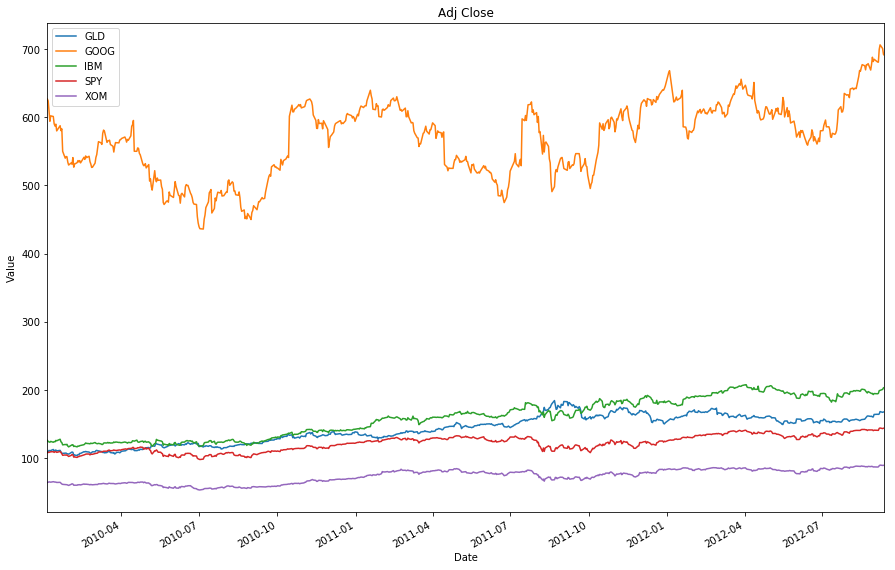

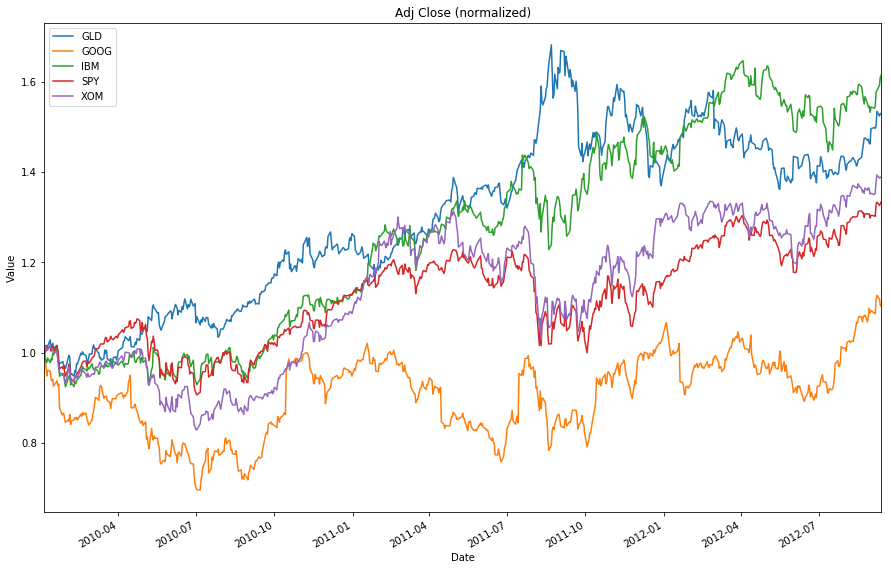

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Lesson 01-02 - Working with multiple stocks
print "Lesson 01-02 - Working with multiple stocks"

def getEmptyDataFrameWithRange(startDate, endDate):
    dates = pd.date_range(startDate, endDate)
    return pd.DataFrame(index=dates)

def loadData(symbols, column, startDate, endDate, dropNan=True):
    dfResult = getEmptyDataFrameWithRange(startDate, endDate)
    for symbol in symbols:
        dfSymbol = pd.read_csv('data/{}.csv'.format(symbol), index_col='Date', parse_dates=True, usecols=['Date',column], na_values=['nan'])
        dfSymbol = dfSymbol.rename(columns={column: symbol})
        # join (left join) the 2 dataframes and remove rows with NaN
        dfResult = dfResult.join(dfSymbol)
        if dropNan == True:
            dfResult = dfResult.dropna()
    return dfResult

symbols = ['GLD', 'GOOG', 'IBM', 'SPY', 'XOM']
column  = 'Adj Close'
df = loadData(symbols, column, '2010-01-01', '2012-12-31')

%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

# values plot
axes = df.plot(title=column, fontsize=10)
axes.set_xlabel('Date')
axes.set_ylabel('Value')
plt.show()

# normalization
df.sort_index(inplace=True) # sort by index columns
dfNorm = df / df.ix[0,:] # divide all rows by the first one

# normalized plot
axes = dfNorm.plot(title='{} (normalized)'.format(column), fontsize=10)
axes.set_xlabel('Date')
axes.set_ylabel('Value')
plt.show()

Lesson 01-04 - Statistical analysis of time series

		Global statistics

Mean:
GLD     142.603279
GOOG    568.941941
IBM     159.669735
SPY     121.711206
XOM      73.296221
dtype: float64

Median:
GLD     146.440
GOOG    578.845
IBM     161.425
SPY     123.305
XOM      76.440
dtype: float64

Standard deviation:
GLD     20.562938
GOOG    54.068129
IBM     28.731772
SPY     11.626556
XOM     10.168104
dtype: float64

Sum:
GLD      96970.23
GOOG    386880.52
IBM     108575.42
SPY      82763.62
XOM      49841.43
dtype: float64


		Rolling statistics


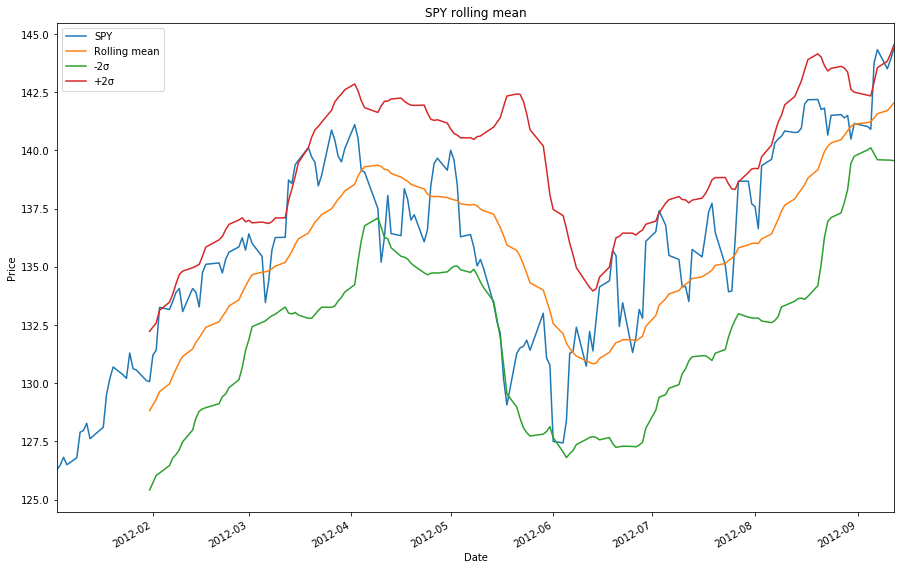

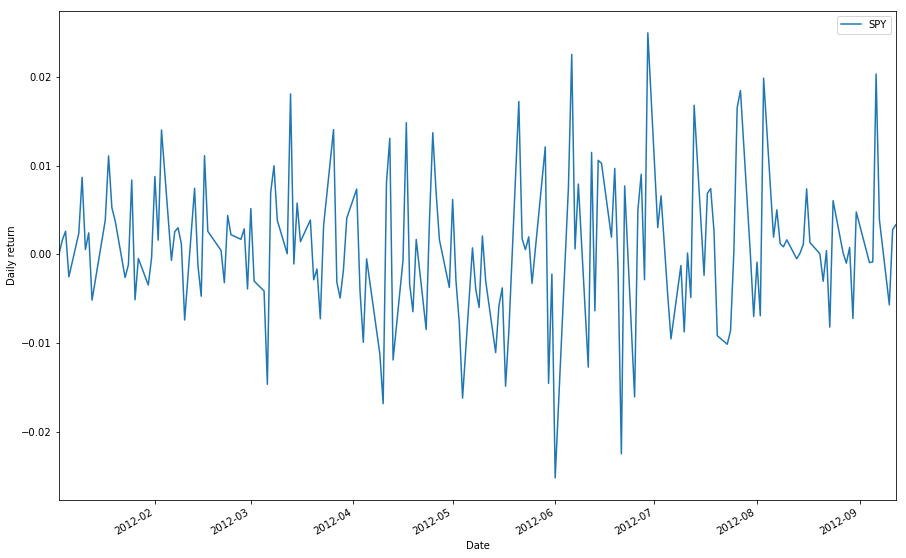

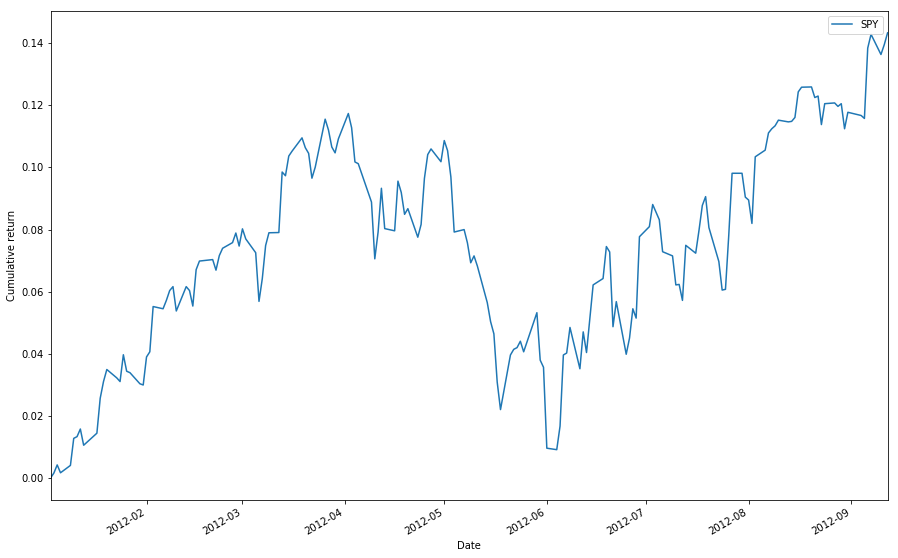

In [3]:
# Lesson 01-04
print "Lesson 01-04 - Statistical analysis of time series"

print "\n\t\tGlobal statistics"

print "\nMean:"
print df.mean()

print "\nMedian:"
print df.median()

print "\nStandard deviation:"
print df.std()

print "\nSum:"
print df.sum()

print "\n\n\t\tRolling statistics"

symbol = 'SPY'
dfRolling = loadData([symbol], 'Adj Close', '2012-01-01', '2012-12-31')
axes = dfRolling[symbol].plot(title='{} rolling mean'.format(symbol), label=symbol)

# compute rolling mean using a 20-day window
window = 20
dfRolling.sort_index(inplace=True) # sort by index columns
rollingMean = dfRolling[symbol].rolling(window=window, center=False).mean()
rollingStd = dfRolling[symbol].rolling(window=window, center=False).std()
rollingMean.plot(label='Rolling mean', ax=axes)
(rollingMean-rollingStd*2).plot(label='-2σ', ax=axes)
(rollingMean+rollingStd*2).plot(label='+2σ', ax=axes)
axes.set_xlabel('Date')
axes.set_ylabel('Price')
axes.legend(loc='upper left')
plt.show()

def dailyReturns(data):
    result = data
    result[1:] = (result[1:]/result[:-1].values) - 1 # compute daily returns
    result.ix[0, :] = 0 # set the first row values to 0
    return result

# calculate daily returns
dfReturns = dailyReturns(dfRolling.copy())
# plot daily returns
axes = dfReturns.plot(label='{} daily returns'.format(symbol))
axes.set_xlabel('Date')
axes.set_ylabel('Daily return')
plt.show()

# calculate cumulative returns
dfReturns = dfRolling.copy()
dfReturns = dfReturns.div(dfReturns.ix[0]) - 1 # compute daily returns
# plot cumulative returns
axes = dfReturns.plot(label='{} cumulative returns'.format(symbol))
axes.set_xlabel('Date')
axes.set_ylabel('Cumulative return')
plt.show()

Lesson 01-05 - Incomplete data


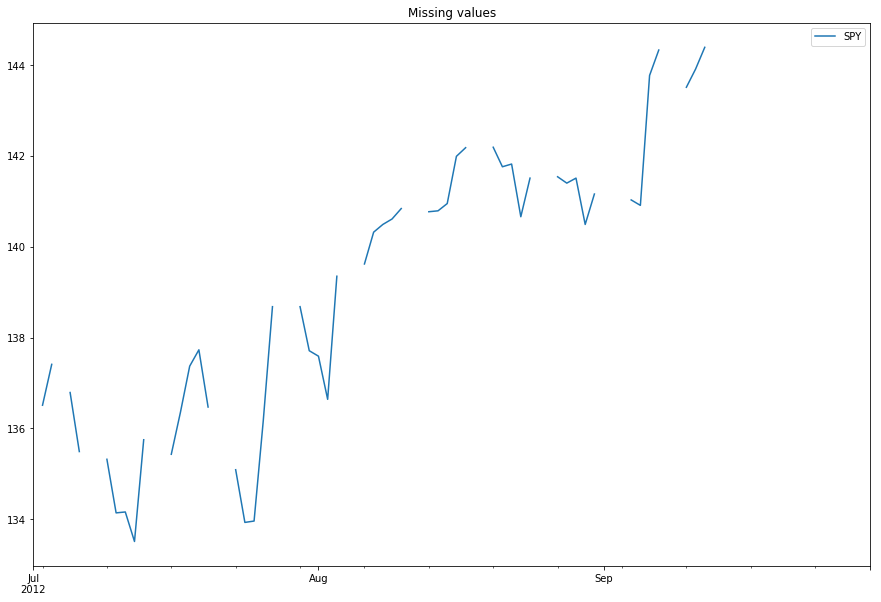

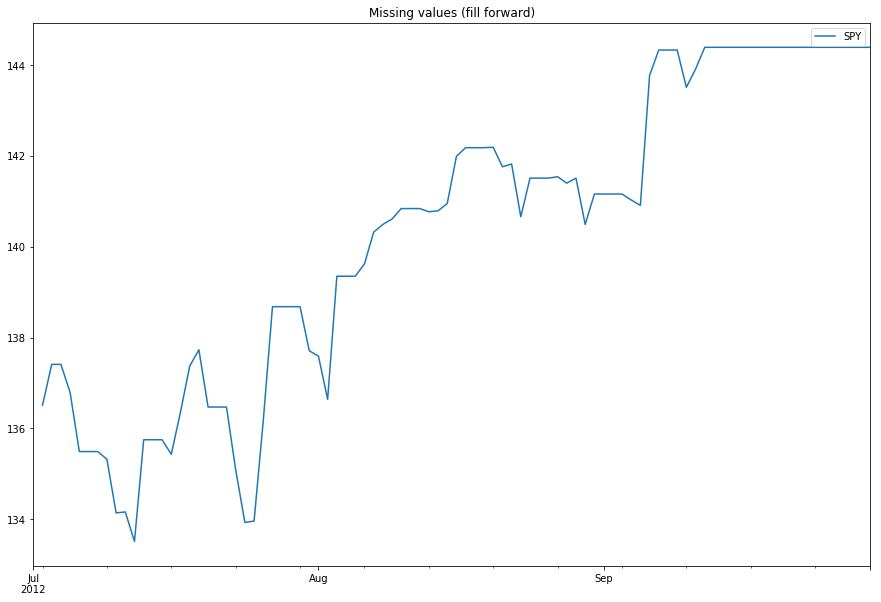

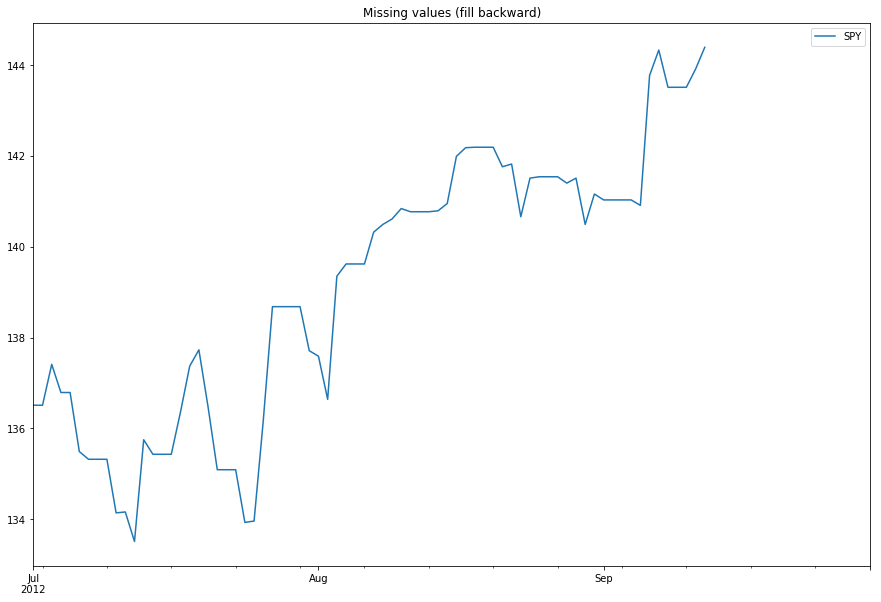

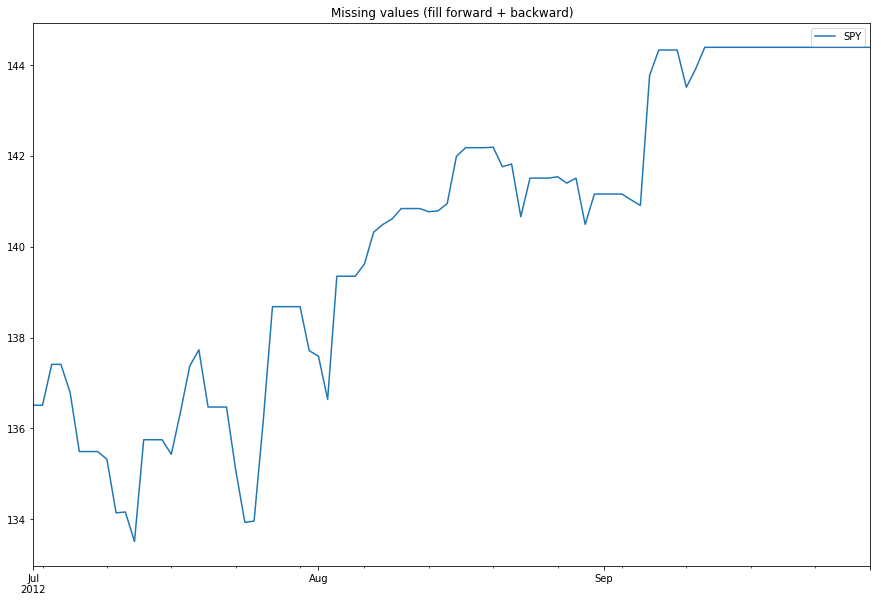

In [4]:
# Lesson 01-05
print "Lesson 01-05 - Incomplete data"

symbols = ['SPY']
column  = 'Adj Close'
startDate = '2012-07-01'
endDate   = '2012-09-30'

dfMissing = loadData(symbols, column, startDate, endDate, dropNan=False)
dfMissing.plot(title='Missing values')
dfMissing.fillna(method='ffill').plot(title='Missing values (fill forward)')
dfMissing.fillna(method='bfill').plot(title='Missing values (fill backward)')
dfMissing.fillna(method='ffill').fillna(method='bfill').plot(title='Missing values (fill forward + backward)')
plt.show()

Lesson 01-06 - Histograms and scatter plots

		Histograms


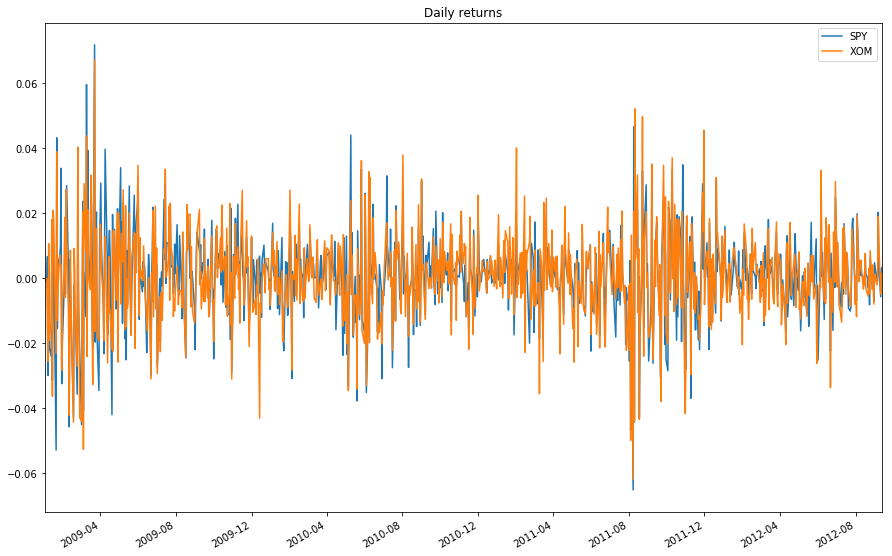

SPY mean: 0.000635578332225
SPY standard deviation: 0.0133704908994


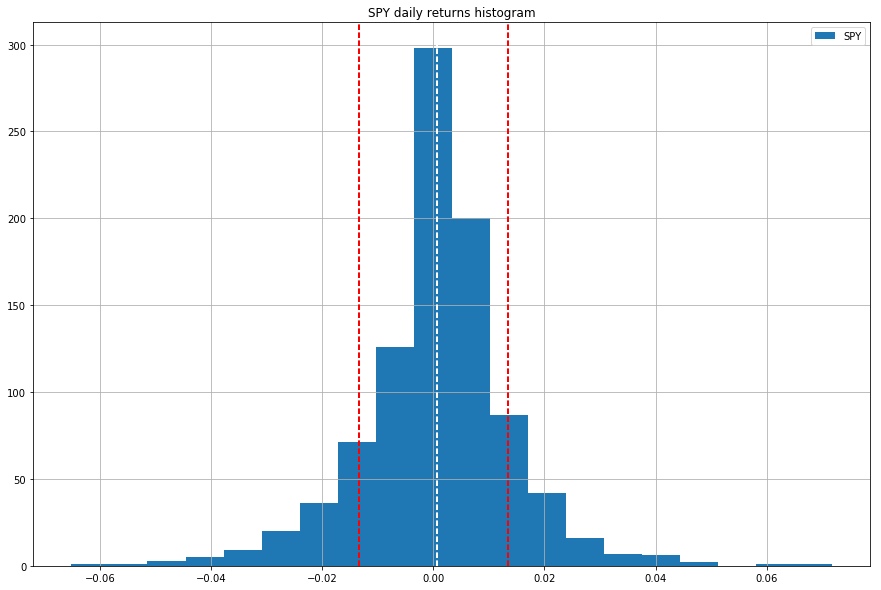

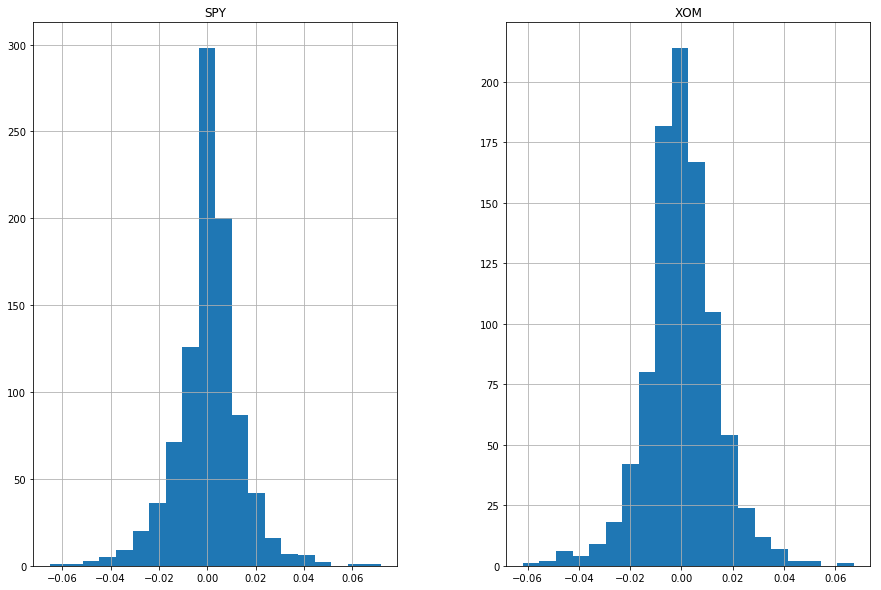


		Scatterplot
XOM: beta=0.850746223673, alpha=-0.00024686727668
GLD: beta=0.0597611348322, alpha=0.00074788111616
Correlation:
          SPY       XOM       GLD
SPY  1.000000  0.820241  0.067324
XOM  0.820241  1.000000  0.069687
GLD  0.067324  0.069687  1.000000


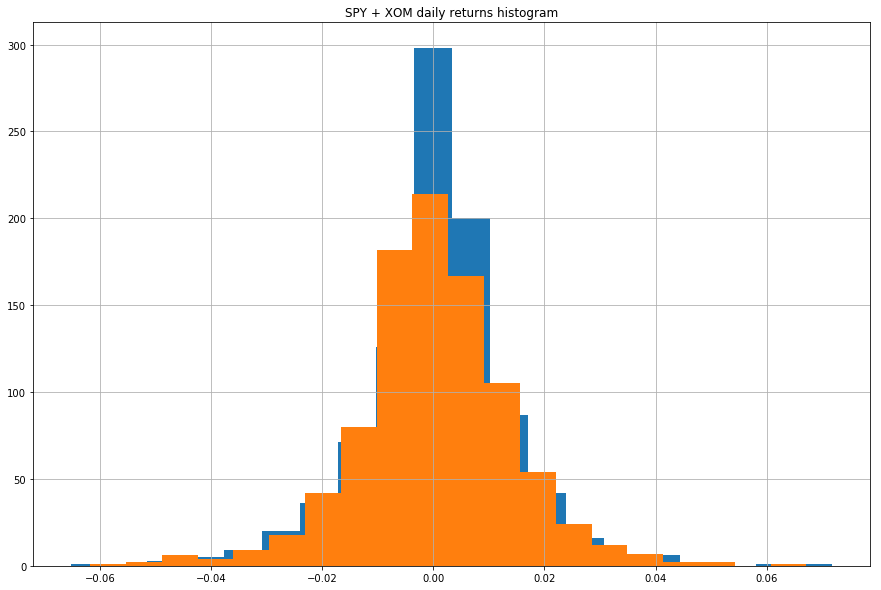

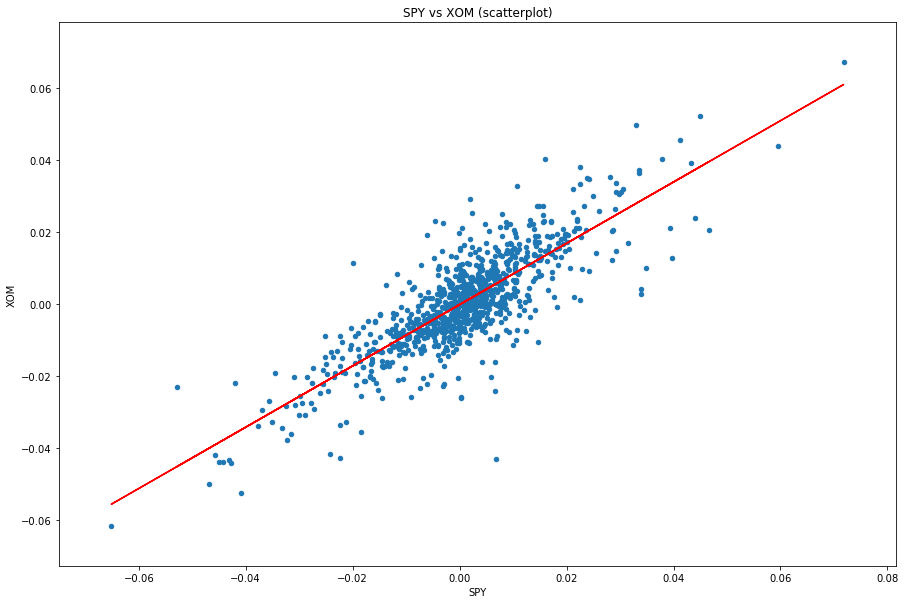

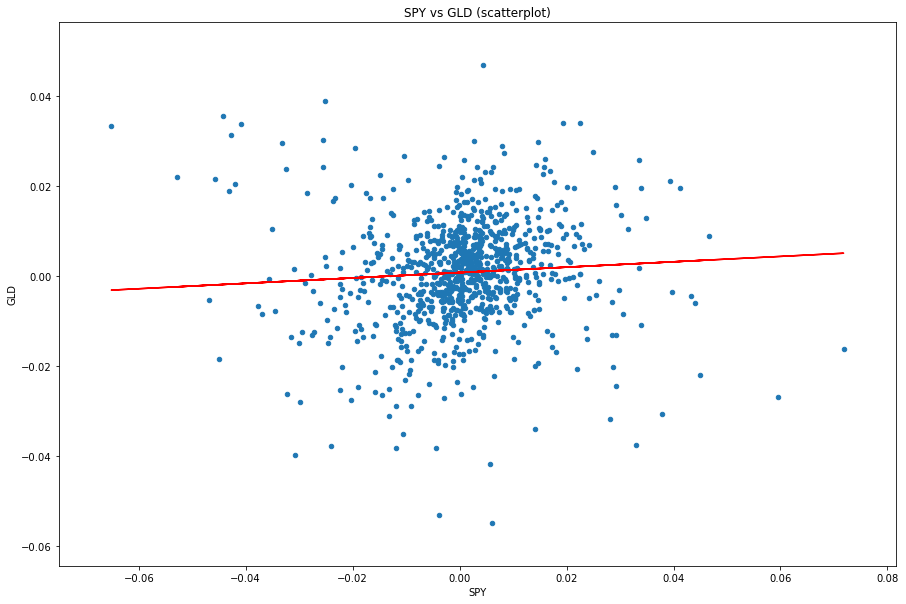

In [12]:
# Lesson 01-06
print "Lesson 01-06 - Histograms and scatter plots"

print "\n\t\tHistograms"

symbols = ['SPY', 'XOM']
column  = 'Adj Close'
startDate = '2009-01-01'
endDate   = '2012-12-31'

dfDaily = dailyReturns(loadData(symbols, column, startDate, endDate))

dfDaily.plot(title='Daily returns')
plt.show()

mean = dfDaily['SPY'].mean()
print 'SPY mean:', mean
std  = dfDaily['SPY'].std()
print 'SPY standard deviation:', std

dfDaily['SPY'].hist(bins=20, label='SPY')
plt.legend(loc='upper right')

plt.axvline(mean, color='w', linestyle='dashed', linewidth=2, label='SPY mean')
plt.axvline( std, color='r', linestyle='dashed', linewidth=2, label='SPY std')
plt.axvline(-std, color='r', linestyle='dashed', linewidth=2, label='SPY -std')
plt.title('SPY daily returns histogram')
plt.show()

dfDaily.hist(bins=20)
plt.legend(loc='upper right')
plt.show()

dfDaily['SPY'].hist(bins=20, label='SPY')
dfDaily['XOM'].hist(bins=20, label='XOM')
plt.title('SPY + XOM daily returns histogram')


print "\n\t\tScatterplot"

symbols = ['SPY', 'XOM', 'GLD']
column  = 'Adj Close'
startDate = '2009-01-01'
endDate   = '2012-12-31'

dfScatter = dailyReturns(loadData(symbols, column, startDate, endDate))

betaXOM, alphaXOM = np.polyfit(dfScatter['SPY'], dfScatter['XOM'], 1)
betaGLD, alphaGLD = np.polyfit(dfScatter['SPY'], dfScatter['GLD'], 1)

print 'XOM: beta={}, alpha={}'.format(betaXOM, alphaXOM)
print 'GLD: beta={}, alpha={}'.format(betaGLD, alphaGLD)
print 'Correlation:'
print dfScatter.corr('pearson')

dfScatter.plot(title='SPY vs XOM (scatterplot)', kind='scatter', x='SPY', y='XOM')
plt.plot(dfScatter['SPY'], betaXOM*dfScatter['SPY'] + alphaXOM, '-', color='r')
plt.show()
dfScatter.plot(title='SPY vs GLD (scatterplot)', kind='scatter', x='SPY', y='GLD')
plt.plot(dfScatter['SPY'], betaGLD*dfScatter['SPY'] + alphaGLD, '-', color='r')
plt.show()